___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***) and **Deep Learning algorithms**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [280]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,classification_report, f1_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from yellowbrick.classifier import PrecisionRecallCurve
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [191]:
df1 = pd.read_csv("Womens Clothing E-commerce Reviews.csv")
df1.head().T

0  \
Unnamed: 0                                                               0   
Clothing ID                                                            767   
Age                                                                     33   
Title                                                                  NaN   
Review Text              Absolutely wonderful - silky and sexy and comf...   
Rating                                                                   4   
Recommended IND                                                          1   
Positive Feedback Count                                                  0   
Division Name                                                    Initmates   
Department Name                                                   Intimate   
Class Name                                                       Intimates   

                                                                         1  \
Unnamed: 0                                                               1   
Clothing ID                                                           1080   
Age                                                                     34   
Title                                                                  NaN   
Review Text              Love this dress!  it's sooo pretty.  i happene...   
Rating                                                                   5   
Recommended IND                                                          1   
Positive Feedback Count                                                  4   
Division Name                                                      General   
Department Name                                                    Dresses   
Class Name                                                         Dresses   

                                                                         2  \
Unnamed: 0                                                               2   
Clothing ID                                                           1077   
Age                                                                     60   
Title                                              Some major design flaws   
Review Text              I had such high hopes for this dress and reall...   
Rating                                                                   3   
Recommended IND                                                          0   
Positive Feedback Count                                                  0   
Division Name                                                      General   
Department Name                                                    Dresses   
Class Name                                                         Dresses   

                                                                         3  \
Unnamed: 0                                                               3   
Clothing ID                                                           1049   
Age                                                                     50   
Title                                                     My favorite buy!   
Review Text              I love, love, love this jumpsuit. it's fun, fl...   
Rating                                                                   5   
Recommended IND                                                          1   
Positive Feedback Count                                                  0   
Division Name                                               General Petite   
Department Name                                                    Bottoms   
Class Name                                                           Pants   

                                                                         4  
Unnamed: 0                                                               4  
Clothing ID                                                            847  
Age                                                                     47  
Title            

### Data Wrangling

In [192]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [193]:
df1['Review Text'].isnull().sum()

845

In [194]:
df1.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [195]:
df1['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

<AxesSubplot:xlabel='Recommended IND', ylabel='count'>

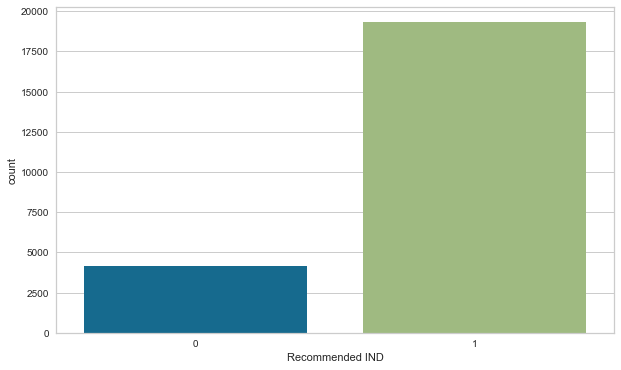

In [196]:
sns.countplot(df1['Recommended IND'])

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [197]:
df=df1[['Review Text','Recommended IND']]

In [198]:
df.columns=['review_text','recommend_ind']

In [199]:
df.head()

review_text  recommend_ind
0  Absolutely wonderful - silky and sexy and comf...              1
1  Love this dress!  it's sooo pretty.  i happene...              1
2  I had such high hopes for this dress and reall...              0
3  I love, love, love this jumpsuit. it's fun, fl...              1
4  This shirt is very flattering to all due to th...              1

---
---


### Missing Value Detection

In [200]:
df.isnull().sum()

review_text      845
recommend_ind      0
dtype: int64

In [201]:
df.dropna(inplace=True)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_text    22641 non-null  object
 1   recommend_ind  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


In [203]:
df.recommend_ind.value_counts(normalize=True)

1    0.818868
0    0.181132
Name: recommend_ind, dtype: float64

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [204]:
df.review_text=df.review_text.apply(lambda x: pd.Series(x).str.replace("(@+\w+)", ""))

In [205]:
stop_words = stopwords.words('english')

In [206]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())
    
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [207]:
df.review_text=df.review_text.apply(cleaning)

### Rare Words

In [208]:
rare_words=pd.Series(" ".join(df.review_text).split()).value_counts()

In [209]:
rare_words=rare_words[rare_words<=2]

In [210]:
rare_words.index

Index(['sling', 'denver', 'sleevless', 'knotting', 'language', 'airing',
       'rubber', 'crumples', 'bei', 'expert',
       ...
       'goi', 'drappiness', 'brushstroke', 'bugged', 'translation', 'wale',
       'skimps', 'legginss', 'nhl', 'transport'],
      dtype='object', length=6497)

In [211]:
df.review_text=df.review_text.apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

<AxesSubplot:xlabel='recommend_ind', ylabel='count'>

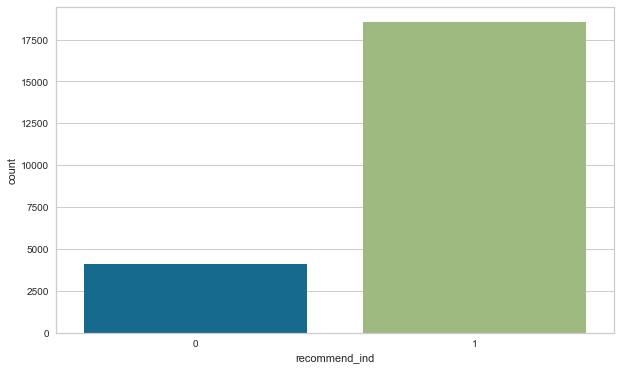

In [212]:
sns.countplot(df.recommend_ind)

In [213]:
positive_word=df.review_text[df.recommend_ind==1]
negative_word=df.review_text[df.recommend_ind==0]

In [214]:
positive_word

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        basket hte last see would look like person sto...
                               ...                        
23479    wasnt sure ordering skirt couldnt see person f...
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes soft stretchy shiny ...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely feminine fit perfectly easy wear ...
Name: review_text, Length: 18540, dtype: object

In [215]:
" ".join(positive_word)

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt basket hte last see would look like person store pick went teh color pale hte color really gorgeous turn trying little baggy hte x hte size bummer petite decided though said everything pant skirt trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc bit big sleeve long doesnt go petite also bit loose xx kept wil later since light color already sold hte smallest size love dress usually get x run little snug bust ordered size flattering feminine us

### Collect Words (positive and negative separately)

In [216]:
positive_word=" ".join(positive_word)
negative_word=" ".join(negative_word)

In [217]:
positive_word

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt basket hte last see would look like person store pick went teh color pale hte color really gorgeous turn trying little baggy hte x hte size bummer petite decided though said everything pant skirt trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc bit big sleeve long doesnt go petite also bit loose xx kept wil later since light color already sold hte smallest size love dress usually get x run little snug bust ordered size flattering feminine us

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [218]:
worldcloud_pos = WordCloud(background_color="white", max_words =250)
worldcloud_neg = WordCloud(background_color="white", max_words =250)

In [219]:
worldcloud_pos.generate(positive_word)
worldcloud_neg.generate(negative_word)

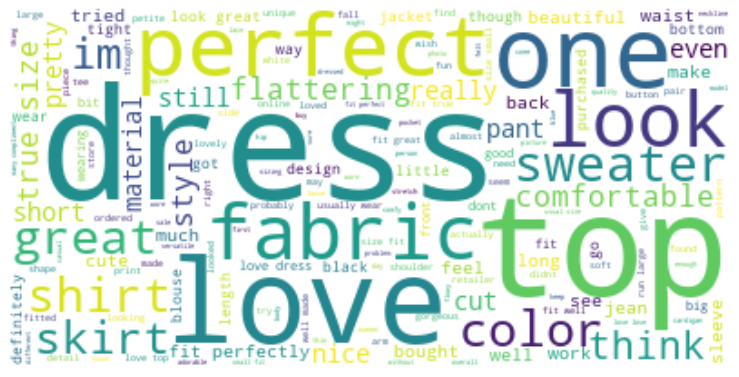

In [220]:
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_pos, interpolation="bilinear",)
plt.axis("off")
plt.show()

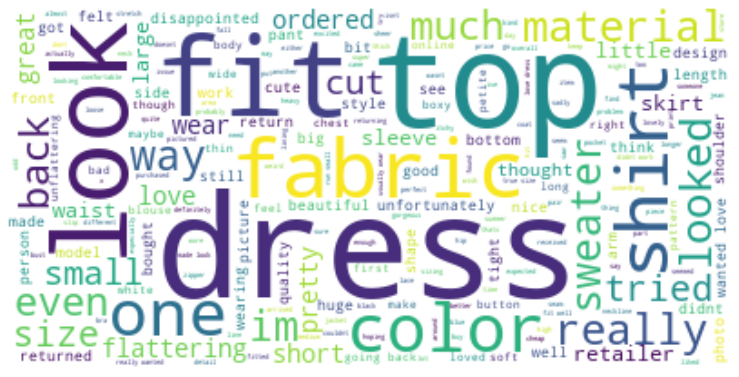

In [221]:
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_neg, interpolation="bilinear",)
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning and Deep Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [291]:
X=df.review_text
y=df.recommend_ind

In [292]:
#y=y.apply(lambda x: 'Positive' if x is 1 else 'Negative')

In [293]:
X.shape

(22641,)

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [295]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    plot_confusion_matrix(model,X_test, y_test)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [296]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

### TF-IDF

In [297]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

## Logistic Regression

### CountVectorizer

In [298]:
from sklearn.utils.class_weight import compute_class_weight
weighting = compute_class_weight('balanced', [0,1], y_train)
print(weighting)

[2.76013411 0.61061291]


LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.61      0.83      0.70       820
           1       0.96      0.88      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.86      0.81      4529
weighted avg       0.90      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.67      0.93      0.78      3281
           1       0.98      0.90      0.94     14831

    accuracy                           0.91     18112
   macro avg       0.83      0.92      0.86     18112
weighted avg       0.93      0.91      0.91     18112



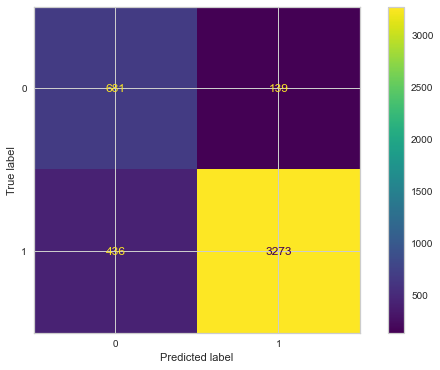

In [386]:
from sklearn.utils.class_weight import compute_class_weight
#log = LogisticRegression(class_weight='balanced') #,solver='lbfgs' can be overfit with this choice
log = LogisticRegression(C = 0.2, max_iter=1000,class_weight='balanced') #class_weight='balanced'
log.fit(X_train_count,y_train)
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

In [300]:
log.classes_

array([0, 1], dtype=int64)

In [301]:
y_test

14572    1
7257     1
16399    1
20493    1
16507    0
        ..
19766    0
1336     1
5997     1
20931    1
8969     1
Name: recommend_ind, Length: 4529, dtype: int64

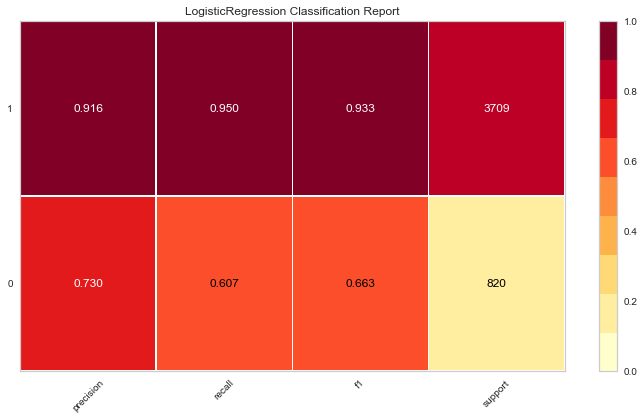

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [302]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(log, support=True)
visualizer.fit(X_train_count, y_train)        # Fit the visualizer and the model
visualizer.score(X_test_count, y_test)        # Evaluate the model on the test data
visualizer.show()

In [303]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.4, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [304]:
viz.score_

0.9834922273964466

In [305]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred,pos_label=0)
log_count_f1_neg = f1_score(y_test, y_pred,pos_label=0)
log_AP_neg = viz.score_

In [306]:
visualizer.scores_

{'precision': {0: 0.7302052785923754, 1: 0.9162984143488433},
 'recall': {0: 0.6073170731707317, 1: 0.9503909409544351},
 'f1': {0: 0.663115845539281, 1: 0.9330333509793541},
 'support': {0: 0.181055420622654, 1: 0.818944579377346}}

In [307]:
recall_score(y_test, y_pred,pos_label=0)

0.6073170731707317

### TF-IDF

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.57      0.87      0.69       820
           1       0.97      0.85      0.91      3709

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.89      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.59      0.90      0.71      3281
           1       0.97      0.86      0.91     14831

    accuracy                           0.87     18112
   macro avg       0.78      0.88      0.81     18112
weighted avg       0.90      0.87      0.88     18112



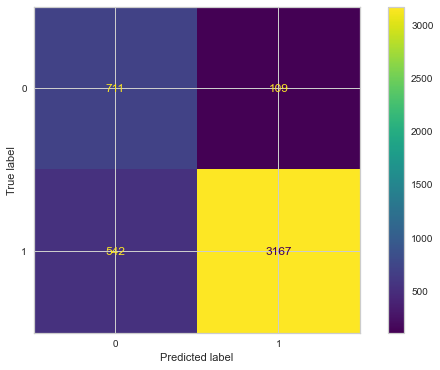

In [388]:

#log = LogisticRegression(class_weight=weighting) #,solver='lbfgs' can be overfit with this choice
log= LogisticRegression(C = 0.2, max_iter=1000,class_weight='balanced') #class_weight='balanced'
log.fit(X_train_tf_idf,y_train)
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

In [309]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec_neg = recall_score(y_test, y_pred, pos_label=0)
log_tfidf_f1_neg = f1_score(y_test, y_pred, pos_label=0)
#log_tfidf_AP_neg = viz.score_["negative"]

## Naive Bayes 

### Countvectorizer

In [310]:
nb = MultinomialNB()
nb.fit(X_train_count,y_train)
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.89      4529
   macro avg       0.80      0.83      0.82      4529
weighted avg       0.89      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.70      0.82      0.75      3281
           1       0.96      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.85     18112
weighted avg       0.91      0.90      0.91     18112



In [311]:
y_pred = nb.predict(X_test_count)
nb_count_rec_neg = recall_score(y_test, y_pred, pos_label=0)
nb_count_f1_neg = f1_score(y_test, y_pred, pos_label=0)

### TF-IDF

In [312]:
nb = MultinomialNB(class_prior=[0.2,0.8])
nb.fit(X_train_tf_idf,y_train)
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.86      0.20      0.33       820
           1       0.85      0.99      0.92      3709

    accuracy                           0.85      4529
   macro avg       0.86      0.60      0.62      4529
weighted avg       0.85      0.85      0.81      4529

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.27      0.42      3281
           1       0.86      1.00      0.92     14831

    accuracy                           0.86     18112
   macro avg       0.90      0.63      0.67     18112
weighted avg       0.87      0.86      0.83     18112



In [313]:
y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec_neg = recall_score(y_test, y_pred, pos_label=0)
nb_tfidf_f1_neg = f1_score(y_test, y_pred,pos_label=0)

## Support Vector Machine (SVM)

### Countvectorizer

In [314]:

svc = LinearSVC(C=0.01)
svc.fit(X_train_count,y_train)
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.78      0.56      0.65       820
           1       0.91      0.96      0.94      3709

    accuracy                           0.89      4529
   macro avg       0.84      0.76      0.79      4529
weighted avg       0.89      0.89      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.85      0.63      0.72      3281
           1       0.92      0.97      0.95     14831

    accuracy                           0.91     18112
   macro avg       0.88      0.80      0.84     18112
weighted avg       0.91      0.91      0.91     18112



In [315]:
y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred, pos_label=0)
svc_count_f1_neg = f1_score(y_test, y_pred, pos_label=0)

### TD-IDF

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.55      0.87      0.67       820
           1       0.97      0.84      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.86      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.56      0.89      0.69      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



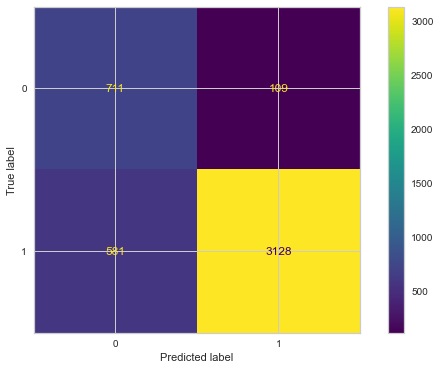

In [316]:
svc = LinearSVC(C=0.01,class_weight='balanced')
svc.fit(X_train_tf_idf,y_train)
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

In [317]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec_neg = recall_score(y_test, y_pred, pos_label=0)
svc_tfidf_f1_neg = f1_score(y_test, y_pred, pos_label=0)

## Random Forest

### Countvectorizer

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.61      0.71      0.66       820
           1       0.93      0.90      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.77      0.81      0.79      4529
weighted avg       0.88      0.87      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.76      0.93      0.83      3281
           1       0.98      0.93      0.96     14831

    accuracy                           0.93     18112
   macro avg       0.87      0.93      0.90     18112
weighted avg       0.94      0.93      0.94     18112



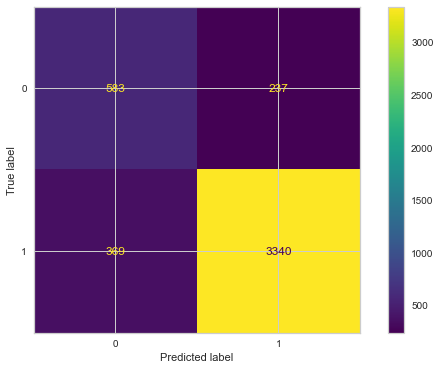

In [318]:
rf = RandomForestClassifier(100, max_depth = 20, random_state = 42, n_jobs = -1,class_weight="balanced") # class_weight="balanced"
rf.fit(X_train_count, y_train)
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

In [319]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, pos_label=0)
rf_count_f1_neg = f1_score(y_test, y_pred, pos_label=0)

### TF-IDF

In [320]:
rf = RandomForestClassifier(100, max_depth=20, random_state = 42, n_jobs = -1,class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.58      0.73      0.65       820
           1       0.94      0.88      0.91      3709

    accuracy                           0.86      4529
   macro avg       0.76      0.81      0.78      4529
weighted avg       0.87      0.86      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.73      0.95      0.82      3281
           1       0.99      0.92      0.95     14831

    accuracy                           0.93     18112
   macro avg       0.86      0.93      0.89     18112
weighted avg       0.94      0.93      0.93     18112



In [321]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test, y_pred, pos_label=0)
rf_tfidf_f1_neg = f1_score(y_test, y_pred, pos_label=0)

## Ada Boosting

### Countvectorizer

Ada MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.72      0.58      0.64       820
           1       0.91      0.95      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.81      0.76      0.78      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.79      0.66      0.72      3281
           1       0.93      0.96      0.94     14831

    accuracy                           0.91     18112
   macro avg       0.86      0.81      0.83     18112
weighted avg       0.90      0.91      0.90     18112



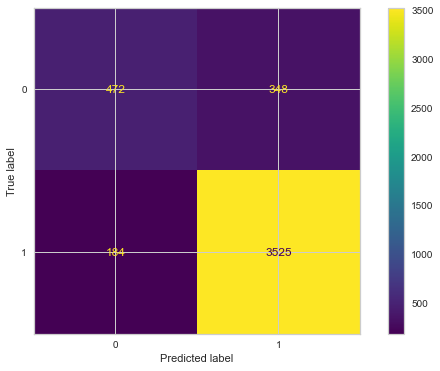

In [322]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

In [323]:
y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred, pos_label=0)
ada_count_f1_neg = f1_score(y_test, y_pred, pos_label=0)

### TF-IDF

Ada MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.70      0.59      0.64       820
           1       0.91      0.95      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.81      0.77      0.79      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      3281
           1       0.94      0.97      0.95     14831

    accuracy                           0.92     18112
   macro avg       0.88      0.84      0.86     18112
weighted avg       0.92      0.92      0.92     18112



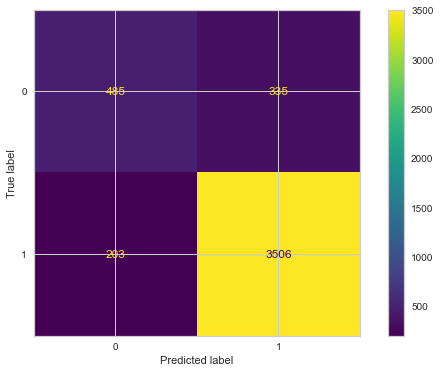

In [324]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

In [325]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(y_test, y_pred, pos_label=0)
ada_tfidf_f1_neg = f1_score(y_test, y_pred, pos_label=0)

## DL modeling

In [340]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [341]:
df2=df1[['Review Text','Recommended IND']]

In [342]:
df2.columns=['review_text','recommend_ind']

In [343]:
df2.isnull().sum()

review_text      845
recommend_ind      0
dtype: int64

In [344]:
df2.dropna(inplace=True)

In [345]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_text    22641 non-null  object
 1   recommend_ind  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


In [346]:
X=df2.review_text.values
y=df2.recommend_ind.values

In [347]:
y

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

### Tokenization

In [348]:
num_words = 15000 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. 
# None değeri atanırsa tüm kelimeler dikkate alınır.
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'

In [349]:
tokenizer.fit_on_texts(X)

### Creating word index

In [350]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [351]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [352]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [353]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

<IPython.core.display.Javascript object>

### Maximum number of tokens for all documents¶

In [354]:
max_tokens=num_tokens.max()

In [355]:
num_tokens.mean()

60.60699615741354

In [356]:
sum(num_tokens<100)/len(num_tokens)

0.9048628594143369

### Fixing token counts of all documents (pad_sequences)

In [357]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

### Train Set Split

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101)

### Modeling

In [359]:
model = Sequential()
embedding_size = 100
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))
model.add(GRU(units=100, return_sequences=True))
model.add(GRU(units=50, return_sequences=True))
model.add(GRU(units=12))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [360]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 116, 100)          1500000   
_________________________________________________________________
gru_15 (GRU)                 (None, 116, 100)          60600     
_________________________________________________________________
gru_16 (GRU)                 (None, 116, 50)           22800     
_________________________________________________________________
gru_17 (GRU)                 (None, 12)                2304      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 1,585,717
Trainable params: 1,585,717
Non-trainable params: 0
_________________________________________________________________


In [361]:
early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 5, restore_best_weights=True)

In [362]:
pd.Series(y_train).value_counts(normalize=True)

1   0.819
0   0.181
dtype: float64

In [363]:
#y_train=y_train.apply(lambda x: 1 if x is 'Positive' else 0)


In [364]:
#y_test=y_test.apply(lambda x: 1 if x is 'Positive' else 0)

In [365]:
weights = {0:82, 1:18}

In [367]:
model.fit(X_train, y_train, epochs=25, batch_size=64,class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
283/283 [==============================] - 93s 315ms/step - loss: 12.6284 - recall: 0.7715 - val_loss: 0.4179 - val_recall: 0.7824
Epoch 2/25
283/283 [==============================] - 101s 355ms/step - loss: 7.9593 - recall: 0.8679 - val_loss: 0.4068 - val_recall: 0.8123
Epoch 3/25
283/283 [==============================] - 134s 473ms/step - loss: 6.0376 - recall: 0.9006 - val_loss: 0.3331 - val_recall: 0.8571
Epoch 4/25
283/283 [==============================] - 124s 437ms/step - loss: 4.8942 - recall: 0.9210 - val_loss: 0.3346 - val_recall: 0.8938
Epoch 5/25
283/283 [==============================] - 135s 476ms/step - loss: 3.6320 - recall: 0.9442 - val_loss: 0.4399 - val_recall: 0.8409
Epoch 6/25
283/283 [==============================] - 153s 540ms/step - loss: 2.9832 - recall: 0.9549 - val_loss: 0.4555 - val_recall: 0.8523
Epoch 7/25
283/283 [==============================] - 154s 545ms/step - loss: 2.6588 - recall: 0.9589 - val_loss: 0.4602 - val_recall: 0.8779
Epoch 

### Model evaluation

In [368]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

loss  recall  val_loss  val_recall
0 12.628   0.771     0.418       0.782
1  7.959   0.868     0.407       0.812
2  6.038   0.901     0.333       0.857
3  4.894   0.921     0.335       0.894
4  3.632   0.944     0.440       0.841

In [369]:
model_loss.plot()

<AxesSubplot:>

In [370]:
model.evaluate(X_train, y_train)

566/566 [==============================] - 40s 69ms/step - loss: 0.1837 - recall: 0.9125


[0.1836678832769394, 0.9125480651855469]

In [371]:
model.evaluate(X_test, y_test)

142/142 [==============================] - 10s 69ms/step - loss: 0.3331 - recall: 0.8571


[0.3330725431442261, 0.8571043610572815]

In [372]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[ 3246    35]
 [ 1297 13534]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.99      0.83      3281
           1       1.00      0.91      0.95     14831

    accuracy                           0.93     18112
   macro avg       0.86      0.95      0.89     18112
weighted avg       0.95      0.93      0.93     18112



In [373]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[ 685  135]
 [ 530 3179]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.56      0.84      0.67       820
           1       0.96      0.86      0.91      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.85      0.79      4529
weighted avg       0.89      0.85      0.86      4529



In [376]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")
dl_rec = recall_score(y_test, y_pred, pos_label=0)
dl_f1 = f1_score(y_test, y_pred, pos_label=0)


In [378]:
review1 = "Love this dress"
review2 = "Absolutely wonderful. silky and sexy and comfortable"
review3 = "i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!"
review4 = "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
review5 = 'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!'
review6 = 'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.'
review7 = 'I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.'
review8 = 'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.'
review9 =  "if you are at least average height or taller, this may look good on you."
review10 = "sadly will be returning, but i'm sure i will find something to exchange it for!"
review11 = "Cute little dress fits tts. it is a little high waisted. good length for my 5'9 height. i like the dress, i'm just not in love with it. i dont think it looks or feels cheap. it appears just as pictured."
review12 = 'Loved the material, but i didnt really look at how long the dress was before i purchased both a large and a medium. im 5\'5" and there was atleast 5" of material at my feet. the gaps in the front are much wider than they look. felt like the dress just fell flat. both were returned. im usually a large and the med fit better. 36d 30 in jeans'
review13 = "I have been waiting for this sweater coat to ship for weeks and i was so excited for it to arrive. this coat is not true to size and made me look short and squat."
review14 = 'Very comfortable, material is good, cut out on sleeves flattering'
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [379]:
tokens = tokenizer.texts_to_sequences(reviews) 
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
model.predict(tokens_pad)

array([[0.78167844],
       [0.99063075],
       [0.97692406],
       [0.99410254],
       [0.99330795],
       [0.14650163],
       [0.99235094],
       [0.02043194],
       [0.24327394],
       [0.6131807 ],
       [0.9368055 ],
       [0.06880662],
       [0.08922178],
       [0.7768627 ]], dtype=float32)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

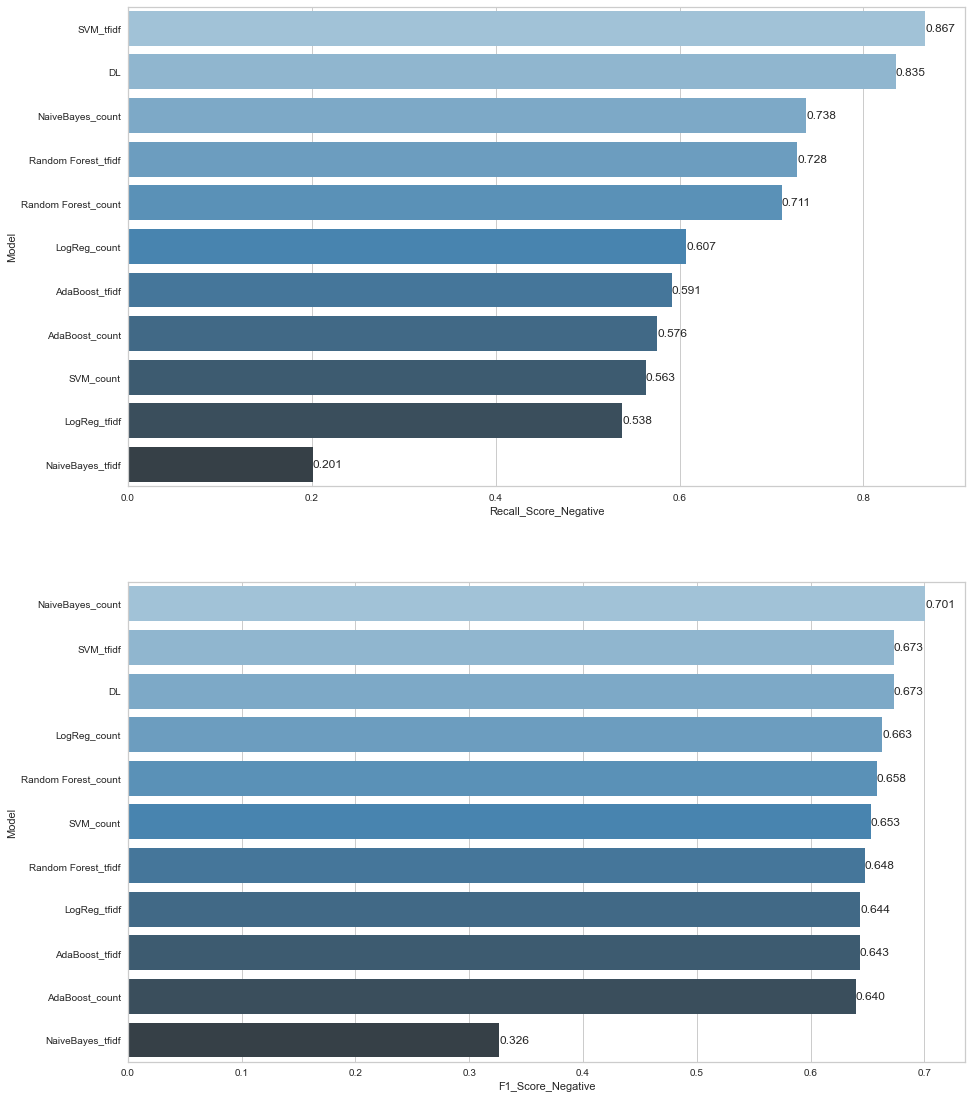

In [377]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf","DL"],
                        
                        "F1_Score_Negative": [nb_count_f1_neg, log_count_f1_neg, svc_count_f1_neg, 
                                             rf_count_f1_neg, ada_count_f1_neg, nb_tfidf_f1_neg, log_tfidf_f1_neg,
                                             svc_tfidf_f1_neg, rf_tfidf_f1_neg, ada_tfidf_f1_neg,dl_f1],
                        
                        "Recall_Score_Negative": [nb_count_rec_neg, log_count_rec_neg, svc_count_rec_neg, 
                                                rf_count_rec_neg, ada_count_rec_neg, 
                                                  nb_tfidf_rec_neg, log_tfidf_rec_neg, svc_tfidf_rec_neg, 
                                                   rf_tfidf_rec_neg, ada_tfidf_rec_neg,dl_rec]})
                        
#                         "Precision_Recall_Score_Negative": [nb_AP_neg, log_AP_neg, svc_AP_neg, knn_AP_neg, rf_AP_neg,
#                                                           ada_AP_neg, nb_tfidf_AP_neg, log_tfidf_AP_neg, svc_tfidf_AP_neg,
#                                                            knn_tfidf_AP_neg, rf_tfidf_AP_neg, ada_tfidf_AP_neg]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)


# plt.subplot(313)
# compare = compare.sort_values(by="Precision_Recall_Score_Negative", ascending=False)
# ax=sns.barplot(x="Precision_Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
# labels(ax)
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___